<img src="registan.png" style="width:990px;height:300px"/>

## Table of contents
* [Introduction: Business problem](#introduction)
* [Data: Description](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business problem<a name="introduction"></a>

 ### Charlotte and Uzbek food

#### I live in Charlotte, North Carolina and you won’t find Uzbek restaurants here. The goal of this project is to gather enough data and provide good analytics to show that opening Uzbek Restaurant in Charlotte is a good investment.

   #### Probably you never heard about Uzbekistan and it’s food. I am from Uzbekistan and you can trust me, our food is delicious with influences from all over Asia and the Middle East! Uzbekistan shares much of its culinary tradition with Turkey as well as serving up a wide number of noodle and dumpling dishes that bear a close resemblance to our counterparts in China, Nepal, and other Eastern Asian countries.       In this project I will try to introduce you with our cuisine. 

#### Charlotte is the second-largest banking center in the United States, after New York City. The nation's second largest financial institution by total assets, Bank of America, calls the city home. It is also home to the nation's sixth largest financial institution, Truist, formed from the merger of BB&T and SunTrust in 2019. Charlotte is the major center of the U.S. motorsports industry, housing the US's only Formula One team, Haas F1, multiple teams and offices of NASCAR. The Charlotte Region has a major base of energy-oriented organizations and has become known as "Charlotte USA – The New Energy Capital".(from wikipedia.org)

## Data: Description<a name="data"></a>

#### In this project I will try to show and explain:
1.	 Why Charlotte is a good place to do business. I will download some tables from Wikipedia.
2.	Why Uzbek restaurant is a good choice. I am going to do little presentation by downloading photos of our most famous dishes (unfortunately I cannot give you to try, you’d definitely love it). 


#### To give you a little idea what is the Uzbek Food and what products we use, I will make a "Word Cloud" ( the more a specific type of product appears in a source of textual data, the bigger and bolder it appears in the word cloud)


#### Using Foursquare I will get location for Turkish and Mediterranean restaurants around Charlotte and then using folium I will put those location on the map of Charlotte.

#### After we will make decision where is the best place or places to locate our Uzbek restaurant.


### Let me extract some tables from Wikipedia. First shows 20 largest employers headquartered in Charlotte by number of employees in the Charlotte region and the second is our sport clubs. 

In [4]:
from pandas.io.html import read_html
page = 'https://en.wikipedia.org/wiki/Charlotte,_North_Carolina'
wikitable = read_html(page, attrs={"class":"wikitable sortable"})
print("Extracted {num} wikitables".format(num=len(wikitable)))

Extracted 3 wikitables


In [5]:
headquarteres=wikitable[0]
headquarteres

,Name,Industry,Number of employees
0,1. Atrium Health,Health Care and Social Assistance,35700
1,2. Charlotte-Mecklenburg Schools,Educational Services,18495
2,3. Bank of America,Finance and Insurance,15000
3,4. Duke Energy,Utilities,7900
4,5. City of Charlotte,Public Administration,6800
5,6. Mecklenburg County Government,Public Administration,5512
6,7. Carowinds,"Arts, Entertainment and Recreation",4100
7,8. University of North Carolina at Charlotte,Educational Services,4000
8,9. Central Piedmont Community College,Educational Services,2700
9,10. Belk,Retail Trade,2300


In [6]:
sport_clubs=wikitable[1]
sport_clubs

,Club,Sport,Founded,League,Venue
0,Carolina Panthers,Football,1995,National Football League,Bank of America Stadium
1,Charlotte Hornets,Basketball,1988,National Basketball Association,Spectrum Center
2,Charlotte FC,Soccer,2019,Major League Soccer,Bank of America Stadium
3,Charlotte Hounds,Lacrosse,2011,Major League Lacrosse,American Legion Memorial Stadium
4,Charlotte Checkers,Ice hockey,2010,American Hockey League,Bojangles' Coliseum
5,Charlotte Knights,Baseball,1976,International League,Truist Field
6,Charlotte Independence,Soccer,2015,USL Championship,Sportsplex at Matthews
7,Charlotte Eagles,Soccer,1993,USL League Two,Sportsplex at Matthews
8,Charlotte Lady Eagles,Soccer,1993,W-League,Sportsplex at Matthews


#### As you can see we do business here and we have fun as well. I hope the information that we have collected will help you understand that Charlotte is a city worth investing in

## Colors!

<img src="colors.jpg" style="width:400px;height:300px"/>

### Plov
#### You can expect a heaping portion of rice that has been cooked together with lamb or beef, onions. garlic, raisins, carrots, and apricots.

<img src="plov.jpg" style="width:400px;height:300px"/>


### Shashlik (Kebabs) 
#### The classic Uzbek shashlik is a dish of shallow meat, usually lamb with a minimum of spices,  plus salt, pepper, spices and sliced onions.

<img src="Shashlik.jpg" style="width:400px;height:300px"/>

### Tandoor Kabob

#### Whole lamb cooked in tandoor (an underground brick oven). 

<img src="tandir.jpg" style="width:400px;height:300px"/>

#### Now let's work on Wordcloud

In [4]:
!pip install wordcloud
import wordcloud



In [7]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
stopwords = set(STOPWORDS)

In [9]:
uzbek_food = open("uzbek_food.txt")
text = uzbek_food.read()
uzbek_food.close()

In [10]:
custom_mask=np.array(Image.open('registan.png'))
uzbek_food_wc = WordCloud(
    background_color='white',
    max_words=100,
    stopwords=stopwords,
    mask=custom_mask
)

uzbek_food_wc.generate(text)

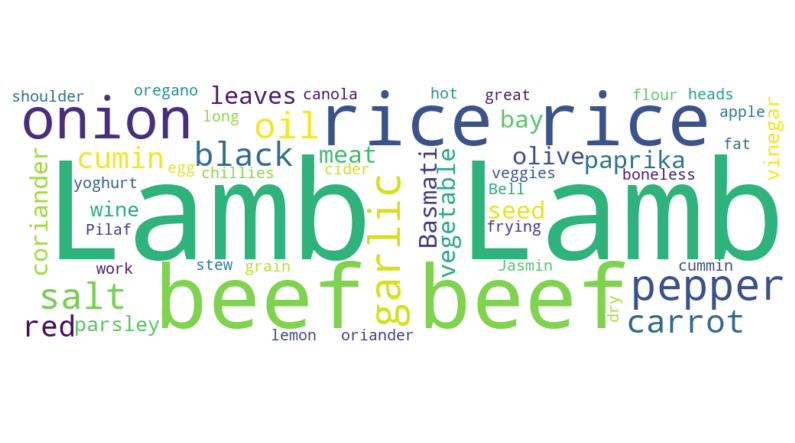

## Methodology<a name ="methodology"></a>

#### In this project we will try to find the best location to open an Uzbek restaurant in Charlotte.

#### First we will find the location of Turkish and Mediterranean restaurants in Charlotte using Foursquare. We not going to search for Uzbek restaurant, because there is no such place in Charlotte. We will be seaching for places, which serves the food similiar to Uzbek, Turkish and Mediterranean would be the best choice to compare.

#### Then we put Turkish and Mediterranean restaurants location together to the Charlotte map using Folium. By doing that we we will be able to detemine which area has less number of thise restaurants.

#### To make decision what area would be the best to place out new Uzbek restaurant, we need to make a research of Charlotte neighbourhoods. Luckily I live in Charlotte and know a bit about city and it's suroundings. 

## Analysis<a name = "analysis"></a>

### Import necessary Libraries

In [1]:
import requests 
import random 
import pgeocode

from IPython.display import Image 
from IPython.core.display import HTML 
    
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::ca-certificates-2020.6.24-0
  - defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0done

# All requested packages already installed.

Folium installed
Libraries imported.


#### The next step is to define Foursquare Credentials and Version

In [2]:
import os
CLIENT_ID = os.environ.get('CLIENT_ID')
CLIENT_SECRET = os.environ.get('CLIENT_SECRET')
print('All done!')

All done!


In [3]:
CLIENT_ID = CLIENT_ID 
CLIENT_SECRET = CLIENT_SECRET
VERSION = '20180604'
LIMIT = 30
print('Your credentails: Done')

Your credentails: Done


#### Let's find out latitude and longitude for Charlotte, usibg the postal code of my home address

In [4]:
nomi = pgeocode.Nominatim('US')
df_codes = nomi.query_postal_code(28211)
df_codes.loc[['latitude', 'longitude']]

latitude     35.1677
longitude   -80.7932
Name: 0, dtype: object

In [5]:
latitude = df_codes['latitude']
longitude =  df_codes['longitude']

#### Now, let's say I am home and I want to order Turkish food, because there is no option for Uzbek food yet.

In [6]:
search_query = 'Turkish'
radius = 10000
print(search_query + ' .... OK!')

Turkish .... OK!


#### Define the corresponding URL

In [7]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=13EP5NALHTPVND30PF5FUGYQ1DULUFBKK4HBLPSYRHWAS0NW&client_secret=OGL2FT0MWHDXJVISXZN33BVIWWSZTDJBUH54MN3ZOFWYTIWD&ll=35.1677,-80.7932&v=20180604&query=Turkish&radius=10000&limit=30'

#### Send the GET Request and examine the results

In [8]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f41923bf26cab155cadc42b'},
 'response': {'venues': []}}

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [9]:
venues = results['response']['venues']

dataframe = json_normalize(venues)
dataframe.head()

<ipython-input-9-b6bf80c30094>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


""


#### So, as you see we couldn't find any Turkish restaurant in the area with Foursquare. I think it is because we specified Turkish, let’s try Mediterranean instead

In [10]:
search_query = 'Mediterranean'
radius = 100000
print(search_query + ' .... OK!')

Mediterranean .... OK!


In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f41924dc7db23607252ccb0'},
 'response': {'venues': []}}

In [12]:
venues = results['response']['venues']

dataframe = json_normalize(venues)
dataframe.head()

<ipython-input-12-b6bf80c30094>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


""


In [13]:
dataframe.shape

(0, 0)

### OK, no result so far. I know there is places with Turkish, Lebanese and meny other Mediterranean kitchen around. But I think they not registered with Foursquare.                                                           Let's try Yelp.

In [14]:
from yelpapi import YelpAPI
import os
import pandas as pd

yelp_api = YelpAPI(os.environ.get('yelp_key'))
print('Done')

Done


In [15]:
term = 'Turkish restaurant bar'
location = 'Charlotte, NC'
search_limit = 10
response = yelp_api.search_query(term = term,
                                 location = location,
                                 limit = search_limit)
type(response)  

dict

In [16]:
cols = list(response['businesses'][0].keys())
restaurants = pd.DataFrame(columns=cols)
for biz in response['businesses']:
    restaurants = restaurants.append(biz, ignore_index=True)
restaurants.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,Im8C3n4D_W9ItRfmAwyxTA,metropolitan-cafe-and-catering-charlotte,Metropolitan Cafe & Catering,https://s3-media2.fl.yelpcdn.com/bphoto/zr3HI1...,False,https://www.yelp.com/biz/metropolitan-cafe-and...,84,"[{'alias': 'turkish', 'title': 'Turkish'}]",3.0,"{'latitude': 35.22591, 'longitude': -80.8466399}",[delivery],$$,"{'address1': '138 Brevard Ct', 'address2': '',...",+17043335175,(704) 333-5175,3628.489901
1,y14TQfHRL5Gkk-CorcR6bg,euro-grill-and-cafe-charlotte,Euro Grill & Cafe,https://s3-media3.fl.yelpcdn.com/bphoto/6kZh6d...,False,https://www.yelp.com/biz/euro-grill-and-cafe-c...,87,"[{'alias': 'modern_european', 'title': 'Modern...",4.5,"{'latitude': 35.219057, 'longitude': -80.796997}",[delivery],$,"{'address1': '2719 Central Ave', 'address2': '...",+17043439828,(704) 343-9828,3976.400333
2,fPmPROBqVT8-D-aTc6VBEQ,al-basha-charlotte,Al-basha,https://s3-media2.fl.yelpcdn.com/bphoto/n3feeB...,False,https://www.yelp.com/biz/al-basha-charlotte?ad...,72,"[{'alias': 'hookah_bars', 'title': 'Hookah Bar...",4.5,"{'latitude': 35.2035786447837, 'longitude': -8...","[pickup, delivery]",$$,"{'address1': '3145 N Sharon Amity Rd', 'addres...",+19802074077,(980) 207-4077,6412.128038
3,NVJ1rVXyThay6Om-Q2LKJA,cedar-land-charlotte,Cedar Land,https://s3-media3.fl.yelpcdn.com/bphoto/VQFgJW...,False,https://www.yelp.com/biz/cedar-land-charlotte?...,42,"[{'alias': 'lebanese', 'title': 'Lebanese'}, {...",4.0,"{'latitude': 35.211861, 'longitude': -80.761811}",[delivery],$,"{'address1': '4832 Central Ave', 'address2': '...",+17045359662,(704) 535-9662,6486.025966
4,PqcOSnCsJTT9Yd2xWKIMWw,la-shish-kabob-charlotte,La Shish Kabob,https://s3-media2.fl.yelpcdn.com/bphoto/S8tNrK...,False,https://www.yelp.com/biz/la-shish-kabob-charlo...,358,"[{'alias': 'mideastern', 'title': 'Middle East...",4.5,"{'latitude': 35.2032998, 'longitude': -80.7604...","[pickup, delivery]",$,"{'address1': '3117-A N Sharon Amity', 'address...",+17045677900,(704) 567-7900,6366.918179


In [17]:
restaurants.shape

(10, 16)

### Finaly we did it! So now we have list  of 50 restaurants around Charlotte, let's put them on the map to visualize there are location.

#### Let's keep places with rating 4.5 and higher.

In [18]:
booleans=[]
for rating in restaurants.rating:
    if rating >= 4.5:
        booleans.append(True)
    else:
        booleans.append(False)

In [19]:
rate = pd.Series(booleans)

In [20]:
restaurants = restaurants[restaurants.rating >=4.5].reset_index(drop=True)

In [21]:
restaurants.shape

(6, 16)

#### So we have 6 restaurants left in our dataframe, now let's get the latitude and longitude.

In [22]:
restaurants

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,y14TQfHRL5Gkk-CorcR6bg,euro-grill-and-cafe-charlotte,Euro Grill & Cafe,https://s3-media3.fl.yelpcdn.com/bphoto/6kZh6d...,False,https://www.yelp.com/biz/euro-grill-and-cafe-c...,87,"[{'alias': 'modern_european', 'title': 'Modern...",4.5,"{'latitude': 35.219057, 'longitude': -80.796997}",[delivery],$,"{'address1': '2719 Central Ave', 'address2': '...",+17043439828,(704) 343-9828,3976.400333
1,fPmPROBqVT8-D-aTc6VBEQ,al-basha-charlotte,Al-basha,https://s3-media2.fl.yelpcdn.com/bphoto/n3feeB...,False,https://www.yelp.com/biz/al-basha-charlotte?ad...,72,"[{'alias': 'hookah_bars', 'title': 'Hookah Bar...",4.5,"{'latitude': 35.2035786447837, 'longitude': -8...","[pickup, delivery]",$$,"{'address1': '3145 N Sharon Amity Rd', 'addres...",+19802074077,(980) 207-4077,6412.128038
2,PqcOSnCsJTT9Yd2xWKIMWw,la-shish-kabob-charlotte,La Shish Kabob,https://s3-media2.fl.yelpcdn.com/bphoto/S8tNrK...,False,https://www.yelp.com/biz/la-shish-kabob-charlo...,358,"[{'alias': 'mideastern', 'title': 'Middle East...",4.5,"{'latitude': 35.2032998, 'longitude': -80.7604...","[pickup, delivery]",$,"{'address1': '3117-A N Sharon Amity', 'address...",+17045677900,(704) 567-7900,6366.918179
3,hcjnOtiW7Bdym3-7PaLUzA,le-kebab-grill-charlotte,Le Kebab Grill,https://s3-media1.fl.yelpcdn.com/bphoto/NR8Zsw...,False,https://www.yelp.com/biz/le-kebab-grill-charlo...,458,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 35.3019365, 'longitude': -80.7491...","[pickup, delivery]",$$,"{'address1': '350 E Mccullough Dr', 'address2'...",+17045477217,(704) 547-7217,13898.930265
4,22MYhTXwSXaS4rW2VOrR-w,jasmine-grill-charlotte,Jasmine Grill,https://s3-media3.fl.yelpcdn.com/bphoto/dUaHa-...,False,https://www.yelp.com/biz/jasmine-grill-charlot...,597,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 35.1684737768456, 'longitude': -8...","[pickup, delivery]",$$,"{'address1': '5033 South Blvd', 'address2': 'S...",+19802071859,(980) 207-1859,5093.450701
5,ZGaW5a7wxXxUgGTtbFqNxg,the-mad-greek-of-charlotte-charlotte-4,The Mad Greek of Charlotte,https://s3-media3.fl.yelpcdn.com/bphoto/Rem1sE...,False,https://www.yelp.com/biz/the-mad-greek-of-char...,343,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...",4.5,"{'latitude': 35.1698647, 'longitude': -80.8756...","[pickup, delivery]",$$,"{'address1': '5011 South Blvd', 'address2': ''...",+17045238296,(704) 523-8296,5029.373376


In [23]:
restaurants_latlng = restaurants.loc[:, ['name', 'coordinates']]
restaurants_latlng

,name,coordinates
0,Euro Grill & Cafe,"{'latitude': 35.219057, 'longitude': -80.796997}"
1,Al-basha,"{'latitude': 35.2035786447837, 'longitude': -8..."
2,La Shish Kabob,"{'latitude': 35.2032998, 'longitude': -80.7604..."
3,Le Kebab Grill,"{'latitude': 35.3019365, 'longitude': -80.7491..."
4,Jasmine Grill,"{'latitude': 35.1684737768456, 'longitude': -8..."
5,The Mad Greek of Charlotte,"{'latitude': 35.1698647, 'longitude': -80.8756..."


In [24]:
latlng = restaurants_latlng['coordinates'].apply(pd.Series)
latlng


,latitude,longitude
0,35.219057,-80.796997
1,35.203579,-80.760565
2,35.203300,-80.760435
3,35.301936,-80.749138
4,35.168474,-80.875257
5,35.169865,-80.875631


In [25]:
restaurants_location = pd.concat([restaurants_latlng, latlng], axis=1).drop('coordinates', axis=1)
restaurants_location

,name,latitude,longitude
0,Euro Grill & Cafe,35.219057,-80.796997
1,Al-basha,35.203579,-80.760565
2,La Shish Kabob,35.203300,-80.760435
3,Le Kebab Grill,35.301936,-80.749138
4,Jasmine Grill,35.168474,-80.875257
5,The Mad Greek of Charlotte,35.169865,-80.875631


#### Time for the Folium

In [26]:
import folium

print('Folium installed')

Folium installed


In [47]:
pip install opencage

We will need Charlotte latitude and longitude for Folium map. To get them we will uce Open Cage Geocode

In [31]:
from opencage.geocoder import OpenCageGeocode

In [42]:
import os
key = os.environ.get('open_cage')

In [45]:
geocoder = OpenCageGeocode('key')

query = 'Charlotte, USA'  

results = geocoder.geocode(query)

print (results)

[{'annotations': {'DMS': {'lat': "35° 13' 37.92000'' N", 'lng': "80° 50' 35.09880'' W"}, 'FIPS': {'county': '37119', 'state': '37'}, 'MGRS': '17SNU1427998250', 'Maidenhead': 'EM95nf84tm', 'Mercator': {'x': -8999410.834, 'y': 4170152.552}, 'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=177415#map=17/35.22720/-80.84308', 'note_url': 'https://www.openstreetmap.org/note/new#map=17/35.22720/-80.84308&layers=N', 'url': 'https://www.openstreetmap.org/?mlat=35.22720&mlon=-80.84308#map=17/35.22720/-80.84308'}, 'UN_M49': {'regions': {'AMERICAS': '019', 'NORTHERN_AMERICA': '021', 'US': '840', 'WORLD': '001'}, 'statistical_groupings': ['MEDC']}, 'callingcode': 1, 'currency': {'alternate_symbols': ['US$'], 'decimal_mark': '.', 'disambiguate_symbol': 'US$', 'html_entity': '$', 'iso_code': 'USD', 'iso_numeric': '840', 'name': 'United States Dollar', 'smallest_denomination': 1, 'subunit': 'Cent', 'subunit_to_unit': 100, 'symbol': '$', 'symbol_first': 1, 'thousands_separator': ','}, '

In [46]:
charlotte_lat = results[0]['geometry']['lat']
charlotte_lng = results[0]['geometry']['lng']
print(charlotte_lat, charlotte_lng)

35.2272 -80.843083


In [47]:
charlotte_map = folium.Map(location = [charlotte_lat, charlotte_lng], zoom_start=12)
charlotte_map

In [48]:
turkish = folium.map.FeatureGroup()

for lat, lng, in zip(restaurants_location.latitude, restaurants_location.longitude):
    turkish.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius = 5,
            color = 'red',
            fill=True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )
charlotte_map.add_child(turkish)    

### OK. I think we did a good job here. But this map does not saying us anything, as we have only six Turkish restaurants in our dataframe. Let's try to get all the data for Mediterranean restaurants, hopefully we get more data out there.

In [49]:
term = 'Mediterranean restaurant bar'
location = 'Charlotte, NC'
search_limit = 50
response = yelp_api.search_query(term = term,
                                 location = location,
                                 limit = search_limit)
type(response) 

dict

In [50]:
cols = list(response['businesses'][0].keys())
med_restaurants = pd.DataFrame(columns=cols)
for biz in response['businesses']:
    med_restaurants = med_restaurants.append(biz, ignore_index=True)
med_restaurants.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,22MYhTXwSXaS4rW2VOrR-w,jasmine-grill-charlotte,Jasmine Grill,https://s3-media3.fl.yelpcdn.com/bphoto/dUaHa-...,False,https://www.yelp.com/biz/jasmine-grill-charlot...,597,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 35.1684737768456, 'longitude': -8...","[delivery, pickup]",$$,"{'address1': '5033 South Blvd', 'address2': 'S...",+19802071859,(980) 207-1859,5093.450701
1,fPmPROBqVT8-D-aTc6VBEQ,al-basha-charlotte,Al-basha,https://s3-media2.fl.yelpcdn.com/bphoto/n3feeB...,False,https://www.yelp.com/biz/al-basha-charlotte?ad...,72,"[{'alias': 'hookah_bars', 'title': 'Hookah Bar...",4.5,"{'latitude': 35.2035786447837, 'longitude': -8...","[pickup, delivery]",$$,"{'address1': '3145 N Sharon Amity Rd', 'addres...",+19802074077,(980) 207-4077,6412.128038
2,aE-02jgBVhV56x0kbfvSIA,yafo-kitchen-charlotte,YAFO Kitchen,https://s3-media2.fl.yelpcdn.com/bphoto/AZIpnB...,False,https://www.yelp.com/biz/yafo-kitchen-charlott...,530,"[{'alias': 'mideastern', 'title': 'Middle East...",4.5,"{'latitude': 35.1565581319107, 'longitude': -8...",[delivery],$$,"{'address1': '720 Gov Morrison St', 'address2'...",+17043657130,(704) 365-7130,4430.883483
3,gUrYm7z0g5a5_jdSXzi-HA,cava-charlotte-3,CAVA,https://s3-media3.fl.yelpcdn.com/bphoto/8TZJHj...,False,https://www.yelp.com/biz/cava-charlotte-3?adju...,243,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 35.309966, 'longitude': -80.747857}",[],$$,"{'address1': '8936 Jm Keynes Blvd', 'address2'...",+17042435900,(704) 243-5900,14721.508052
4,W8CLBV5YN2GGrfHR25OL6w,fusion-lounge-charlotte-3,Fusion Lounge,https://s3-media4.fl.yelpcdn.com/bphoto/BpKVDg...,False,https://www.yelp.com/biz/fusion-lounge-charlot...,8,"[{'alias': 'hookah_bars', 'title': 'Hookah Bar...",3.5,"{'latitude': 35.17209, 'longitude': -80.74691}",[delivery],$$,"{'address1': '6432 E Independence Blvd', 'addr...",+17045312500,(704) 531-2500,8061.347415


In [51]:
med_restaurants.shape

(50, 16)

In [52]:
med_restaurants_latlng = med_restaurants.loc[:, ['name', 'coordinates']]
med_restaurants_latlng.head()

,name,coordinates
0,Jasmine Grill,"{'latitude': 35.1684737768456, 'longitude': -8..."
1,Al-basha,"{'latitude': 35.2035786447837, 'longitude': -8..."
2,YAFO Kitchen,"{'latitude': 35.1565581319107, 'longitude': -8..."
3,CAVA,"{'latitude': 35.309966, 'longitude': -80.747857}"
4,Fusion Lounge,"{'latitude': 35.17209, 'longitude': -80.74691}"


In [53]:
med_latlng = med_restaurants_latlng['coordinates'].apply(pd.Series)
med_latlng.head()

,latitude,longitude
0,35.168474,-80.875257
1,35.203579,-80.760565
2,35.156558,-80.824327
3,35.309966,-80.747857
4,35.172090,-80.746910


In [54]:
med_restaurants_location = pd.concat([med_restaurants_latlng, med_latlng], axis=1).drop('coordinates', axis=1)
med_restaurants_location.head()

,name,latitude,longitude
0,Jasmine Grill,35.168474,-80.875257
1,Al-basha,35.203579,-80.760565
2,YAFO Kitchen,35.156558,-80.824327
3,CAVA,35.309966,-80.747857
4,Fusion Lounge,35.172090,-80.746910


In [55]:
mediterranean = folium.map.FeatureGroup()

for lat, lng, in zip(med_restaurants_location.latitude, med_restaurants_location.longitude):
    mediterranean.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius = 4,
            color = 'red',
            fill=True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )
charlotte_map.add_child(mediterranean)  

### Definitely it looks better.  More restaurants are located in the south and I am not surprised as the south is more populous

## Results and discussion<a name = "results"></a>

#### As we can see most of the rastaurants are spreaded around the city. Most of the restaurants placed in the city center of Charlotte, we call this place Uptown, it is also a business center of Charlotte. Uptown is a not good choice to open a Uzbek restaurant, because it's already has many places and most of them making business during lunch time. 
#### We are looking for place where people going after work or on weekend to have fun and proper meal. My choice would be area around Central Avenue. This area is growing and it has future prospects. Also we can see some places with Turkish and Mediterranean restaurants in that area. 
#### As Uzbek food needs time. You have to be relaxed to enjoy your meal.

## Conclusion<a name = "conclusion"></a>

#### In this project I tryed to introduce you to Uzbek food. I hope by this time you have little idea what is it. I think one day you will try. I am sure if you try Uzbek food once, you will want to come back.

#### To make decision about your preferences you have to try and I am ready to make your first Uzbek Feast!
#### I would like to say you more, but my English is little poor.